In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# data = pd.read_sas('LLCP2020.XPT ', format='xport')

# df = pd.DataFrame()
# df['sex'] = data['SEXVAR'].replace(1, 'M').replace(2, 'F').astype("category")
# df['height'] = data['HTIN4']
# df = df.dropna()
# df['height'] = df['height'].astype('int')
# df.to_feather('heights.feather')

df = pd.read_feather('heights.feather')
df.head()

,sex,height
0,F,67.0
1,F,64.0
2,F,68.0
3,F,NaN
4,F,66.0


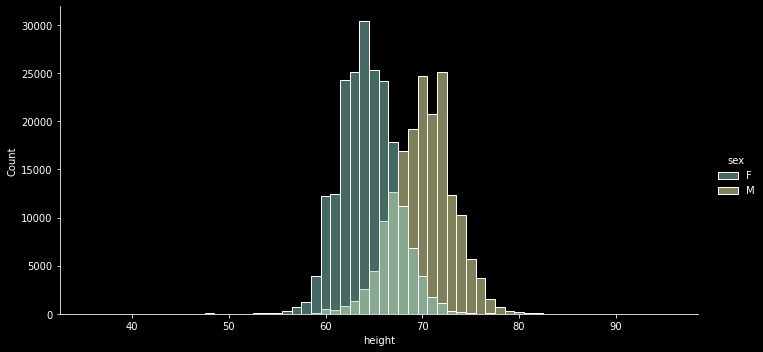

In [3]:
sns.displot(data=df, x='height', hue='sex', discrete=True, fill=True, aspect=2) 

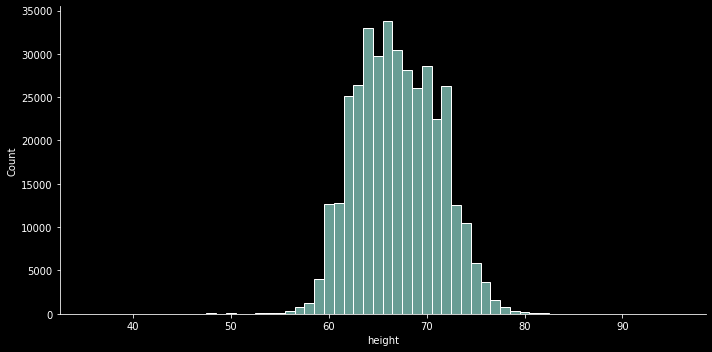

In [4]:
sns.displot(data=df, x='height', discrete=True, aspect=2)

In [5]:
x = df[['height']].dropna()
from sklearn.mixture import GaussianMixture
gmm2 = GaussianMixture(n_components=2)
gmm2.fit(x)
gmm1 = GaussianMixture(n_components=1)
gmm1.fit(x)
gmm3 = GaussianMixture(n_components=3)
gmm3.fit(x)

GaussianMixture(n_components=3)

In [6]:
gmm1.bic(x), gmm2.bic(x), gmm3.bic(x)

(2156453.9249906573, 2148528.44563105, 2152735.8534608423)

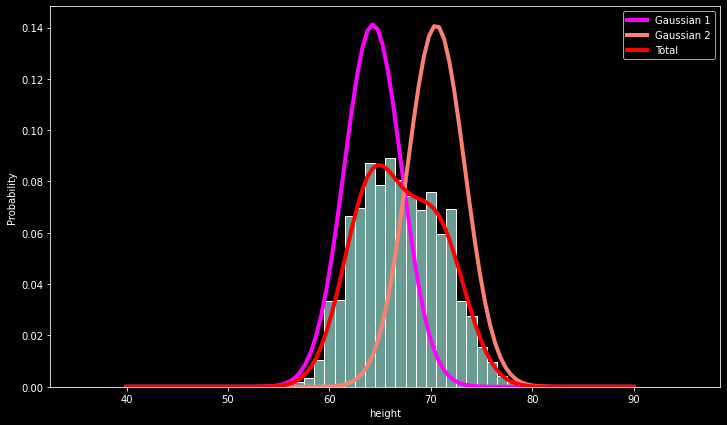

In [7]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(data=df, x='height', discrete=True, ax=ax, stat='probability')
xx = np.linspace(40, 90, 100)
norm1 = stats.norm(gmm2.means_[0], np.sqrt(gmm2.covariances_[0][0]))
norm2 = stats.norm(gmm2.means_[1], np.sqrt(gmm2.covariances_[1][0]))
plt.plot(xx, norm1.pdf(xx), color='fuchsia', lw=4, label='Gaussian 1')
plt.plot(xx, norm2.pdf(xx), color='salmon', lw=4, label='Gaussian 2')
plt.plot(xx, np.dot(np.array([norm1.pdf(xx), norm2.pdf(xx)]).T, gmm2.weights_), color='red', lw=4, label='Total')
plt.legend();

In [13]:
from bokeh.plotting import figure, show
from bokeh.themes import Theme as _BkTheme
import seaborn as sns
import bokeh
from bokeh.transform import factor_cmap, factor_mark
import panel as pn
import param
import pathlib

pn.extension()

data = sns.load_dataset('penguins')
SPECIES = sorted(data.species.unique())
MARKERS = ['hex', 'circle_x', 'triangle']

p = figure(title = "Penguin Size", tooltips=[
    (name, '@{' + name + '}') for name in data.columns
], sizing_mode='scale_width')


p.xaxis.axis_label = 'Flipper Length (mm)'
p.yaxis.axis_label = 'Body Mass (g)'

p.scatter("flipper_length_mm", "body_mass_g", source=data,
          legend_group="species", fill_alpha=0.4, size=12,
          marker=factor_mark('species', MARKERS, SPECIES),
          color=factor_cmap('species', 'Category10_3', SPECIES))

font = "myriad-pro-semi-condensed"
text_color = '#777777'
p.border_fill_alpha = 0
p.background_fill_alpha = 0
p.axis.axis_label_text_color = text_color
p.legend.title_text_color = text_color
p.legend.label_text_color = text_color
p.axis.major_label_text_color = text_color
p.title.text_color = text_color
p.legend.location = "top_left"
p.legend.title = "Species"
p.legend.background_fill_alpha = 0
p.title_location = "above"
p.legend.title_text_font = font
p.legend.title_text_font_style = "bold"
p.legend.label_text_font_size = '15px'
p.legend.title_text_font_size = '15px'
p.legend.label_text_font = font
p.axis.axis_label_text_font_style = "normal"
p.axis.axis_label_text_font = font
p.axis.axis_label_text_font_size = '20px'
p.axis.major_label_text_font = font
p.axis.major_label_text_font_size = '15px'
p.title.text_font = font
p.title.text_font_style = 'normal'
p.title.text_font_size = "20px"
p.grid.grid_line_alpha = 0
p.axis.major_tick_line_alpha = 0
p.axis.minor_tick_line_alpha = 0

# class SpectrumTemplate(pn.template.base.BasicTemplate):
#     _template = pathlib.Path("/home/nicholas/programs/rho/themes/panel/template.html")
#     _nb_template = pathlib.Path("/home/nicholas/programs/rho/themes/panel/template.html")
#     _resources = {
#         'css': {
#             'spectrum': 'https://unpkg.com/@adobe/spectrum-css@3.0.0/dist/vars/spectrum-global.css'
#         }
#     }


# class SpectrumTheme(pn.template.DefaultTheme):
#     _template = SpectrumTemplate
#     base_css = param.Filename(default="/home/nicholas/programs/rho/themes/panel/spectrum.css")
#     bokeh_theme = param.ClassSelector(class_=(_BkTheme, str),
#                                       default=_BkTheme(filename="/home/nicholas/programs/rho/themes/panel/spectrum.yml"))


plot = pn.Row(pn.pane.Bokeh(p))
# plot

In [14]:
root = plot.get_root(bokeh.io.curdoc())
script, tag = bokeh.embed.autoload_static(root, bokeh.resources.CDN, '../plots/plot1.js')
js_script = '\n'.join(script.strip().splitlines()[1:-1])
with open('site/plots/plot1.js', 'w') as out:
    out.write(js_script)
print(tag.strip())

<script src="../plots/plot1.js" id="742c74c3-be1a-4991-ac11-526962881578"></script>


In [24]:
p = figure(title = "Prior Belief", sizing_mode='scale_width', x_range=(0, 1), y_range=(0, 2))


p.xaxis.axis_label = 'True Accuracy'
p.yaxis.axis_label = 'Prior Probability'

xx = np.linspace(0, 1, 100)
yy = stats.beta.pdf(xx, a=1, b=1)
p.line(x=xx, y=yy)
pn.pane.Bokeh(p)

BokehModel(combine_events=True, render_bundle={'docs_json': {'43133748-701b-4a41-93d0-11deafcd6f86': {'defs': …

Bokeh(Figure)

In [26]:
from scipy import stats
p = figure(title = "Prior Belief", sizing_mode='scale_width', x_range=(0, 1), y_range=(0.5, 1.5))


p.xaxis.axis_label = 'True Accuracy'
p.yaxis.axis_label = 'Prior Probability'

xx = np.linspace(0, 1, 100)
yy = stats.beta.pdf(xx, a=1, b=1)
p.line(xx, yy)

font = "myriad-pro-semi-condensed"
text_color = '#777777'
p.border_fill_alpha = 0
p.background_fill_alpha = 0
p.axis.axis_label_text_color = text_color
p.legend.title_text_color = text_color
p.legend.label_text_color = text_color
p.axis.major_label_text_color = text_color
p.title.text_color = text_color
p.legend.location = "top_left"
p.legend.title = "Species"
p.legend.background_fill_alpha = 0
p.title_location = "above"
p.legend.title_text_font = font
p.legend.title_text_font_style = "bold"
p.legend.label_text_font_size = '15px'
p.legend.title_text_font_size = '15px'
p.legend.label_text_font = font
p.axis.axis_label_text_font_style = "normal"
p.axis.axis_label_text_font = font
p.axis.axis_label_text_font_size = '20px'
p.axis.major_label_text_font = font
p.axis.major_label_text_font_size = '15px'
p.title.text_font = font
p.title.text_font_style = 'normal'
p.title.text_font_size = "20px"
p.grid.grid_line_alpha = 0
p.axis.major_tick_line_alpha = 0
p.axis.minor_tick_line_alpha = 0

# class SpectrumTemplate(pn.template.base.BasicTemplate):
#     _template = pathlib.Path("/home/nicholas/programs/rho/themes/panel/template.html")
#     _nb_template = pathlib.Path("/home/nicholas/programs/rho/themes/panel/template.html")
#     _resources = {
#         'css': {
#             'spectrum': 'https://unpkg.com/@adobe/spectrum-css@3.0.0/dist/vars/spectrum-global.css'
#         }
#     }


# class SpectrumTheme(pn.template.DefaultTheme):
#     _template = SpectrumTemplate
#     base_css = param.Filename(default="/home/nicholas/programs/rho/themes/panel/spectrum.css")
#     bokeh_theme = param.ClassSelector(class_=(_BkTheme, str),
#                                       default=_BkTheme(filename="/home/nicholas/programs/rho/themes/panel/spectrum.yml"))


plot = pn.Row(pn.pane.Bokeh(p))

/home/nicholas/anaconda3/envs/ds/lib/python3.7/site-packages/bokeh/models/plots.py:766: UserWarning: 
You are attempting to set `plot.legend.title_text_color` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
/home/nicholas/anaconda3/envs/ds/lib/python3.7/site-packages/bokeh/models/plots.py:766: UserWarning: 
You are attempting to set `plot.legend.label_text_color` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
/home/nicholas/anaconda3/envs/ds/lib/python3.7/site-packages/bokeh/models/plots.py:766: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no ef

In [27]:
root = plot.get_root(bokeh.io.curdoc())
script, tag = bokeh.embed.autoload_static(root, bokeh.resources.CDN, '../plots/plot2.js')
js_script = '\n'.join(script.strip().splitlines()[1:-1])
with open('site/plots/plot2.js', 'w') as out:
    out.write(js_script)
print(tag.strip())

<script src="../plots/plot2.js" id="dfb3b0b9-4491-4a8a-946f-ea540b131bb1"></script>


In [47]:
class Binomial(param.Parameterized):
    n = param.ObjectSelector(default=10, objects=[3, 5, 10, 20, 50], label="Number of Trials")
    p = param.Number(default=0.5, bounds=(0, 1), step=0.05, label="Success Probability")
    
    @pn.depends('n', 'p')
    def plot(self):
        xx = np.arange(0, self.n + 1)
        yy = stats.binom(n=self.n, p=self.p).pmf(xx)
        width = 1
        p = figure(title=f"Binomial Probability Distribution", sizing_mode='scale_both',
                   x_range=(-width, self.n + width),
                   y_range=(0, max(yy) * 1.5))

        p.vbar(x=xx, width=width, bottom=0, top=yy, line_color='white')

        return p

binom = Binomial(n=3)
pn.Column(pn.Param(binom.param), binom.plot).servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'6194119e-9818-4e94-b6d3-1459db578202': {'defs': …

Column
    [0] Param(Binomial)
    [1] ParamMethod(method)

In [58]:
from bokeh.plotting import figure, show

import seaborn as sns
import bokeh
from bokeh.transform import factor_cmap, factor_mark
import panel as pn
import param
import numpy as np
from scipy import stats


class Binomial(param.Parameterized):
    n = param.ObjectSelector(default=10, objects=[3, 5, 10, 20, 50], label="Number of Trials")
    p = param.Number(default=0.5, bounds=(0, 1), label="Success Probability")

    
    @pn.depends('n', 'p')
    def plot(self):
        xx = np.arange(0, self.n + 1)
        yy = stats.binom(n=self.n, p=self.p).pmf(xx)
        width = 1
        p = figure(title=f"Binomial Probability Distribution", sizing_mode='scale_both',
                   x_range=(-width, self.n + width),
                   y_range=(0, max(yy) * 1.5))

        p.vbar(x=xx, width=width, bottom=0, top=yy, line_color='white')
        p.toolbar_location = None
        font = "myriad-pro-semi-condensed"
        text_color = '#777777'
        p.border_fill_alpha = 0
        p.background_fill_alpha = 0
        p.axis.axis_label_text_color = text_color
        p.legend.title_text_color = text_color
        p.legend.label_text_color = text_color
        p.axis.major_label_text_color = text_color
        p.title.text_color = text_color
        p.legend.location = "top_left"
        p.legend.title = "Species"
        p.legend.background_fill_alpha = 0
        p.title_location = "above"
        p.legend.title_text_font = font
        p.legend.title_text_font_style = "bold"
        p.legend.label_text_font_size = '15px'
        p.legend.title_text_font_size = '15px'
        p.legend.label_text_font = font
        p.axis.axis_label_text_font_style = "normal"
        p.axis.axis_label_text_font = font
        p.axis.axis_label_text_font_size = '20px'
        p.axis.major_label_text_font = font
        p.axis.major_label_text_font_size = '15px'
        p.title.text_font = font
        p.title.text_font_style = 'normal'
        p.title.text_font_size = "20px"
        p.grid.grid_line_alpha = 0
        p.axis.major_tick_line_alpha = 0
        p.axis.minor_tick_line_alpha = 0

        return pn.pane.Bokeh(p)

# class SpectrumTemplate(pn.template.base.BasicTemplate):
#     _template = pathlib.Path("/home/nicholas/programs/rho/themes/panel/template.html")
#     _nb_template = pathlib.Path("/home/nicholas/programs/rho/themes/panel/template.html")
#     _resources = {
#         'css': {
#             'spectrum': 'https://unpkg.com/@adobe/spectrum-css@3.0.0/dist/vars/spectrum-global.css'
#         }
#     }


# class SpectrumTheme(pn.template.DefaultTheme):
#     _template = SpectrumTemplate
#     base_css = param.Filename(default="/home/nicholas/programs/rho/themes/panel/spectrum.css")
#     bokeh_theme = param.ClassSelector(class_=(_BkTheme, str),
#                                       default=_BkTheme(filename="/home/nicholas/programs/rho/themes/panel/spectrum.yml"))

binom = Binomial(n=10, p=0.5)
static = pn.Column(pn.Param(binom.param), binom.plot).embed(max_opts=30, save_path='./site/plots/', json=True, load_path='./')

/home/nicholas/anaconda3/envs/ds/lib/python3.7/site-packages/bokeh/models/plots.py:766: UserWarning: 
You are attempting to set `plot.legend.title_text_color` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
/home/nicholas/anaconda3/envs/ds/lib/python3.7/site-packages/bokeh/models/plots.py:766: UserWarning: 
You are attempting to set `plot.legend.label_text_color` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
/home/nicholas/anaconda3/envs/ds/lib/python3.7/site-packages/bokeh/models/plots.py:766: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no ef

In [57]:
root = plot.get_root(bokeh.io.curdoc())
script, tag = bokeh.embed.autoload_static(root, bokeh.resources.CDN, '../plots/plot3.js')
js_script = '\n'.join(script.strip().splitlines()[1:-1])
with open('site/plots/plot3.js', 'w') as out:
    out.write(js_script)
print(tag.strip())

RuntimeError: Models must be owned by only a single document, Line(id='1908', ...) is already in a doc